In [2]:
import numpy as np
import g3lhalo
import pyccl as ccl
import matplotlib.pyplot as plt

In [3]:
model=g3lhalo.halomodel(1e-4, 1e7, 0.001, 2, 1e10, 1e17)

In [4]:
# Cosmology

model.set_cosmo(0.27, 0.045, 0.67, 0.83, 0.96)


In [5]:


ks=np.geomspace(1e-4, 1e7, 128)
zs=np.linspace(0.001, 2, 128)

a=1/(1+zs)

cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.83, n_s=0.96)

pk_lin=ccl.linear_matter_power(cosmo, ks, a)

w = ccl.comoving_angular_distance(cosmo, a)

c_over_H0=3000 #Mpc/h
dwdz=1/np.sqrt(ccl.h_over_h0(cosmo, a))*c_over_H0

In [6]:
ccl.rho_x(cosmo,a, 'matter')

array([3.93625022e+10, 4.12487124e+10, 4.31942369e+10, 4.51999941e+10,
       4.72669021e+10, 4.93958792e+10, 5.15878436e+10, 5.38437136e+10,
       5.61644075e+10, 5.85508434e+10, 6.10039397e+10, 6.35246145e+10,
       6.61137862e+10, 6.87723729e+10, 7.15012929e+10, 7.43014645e+10,
       7.71738059e+10, 8.01192353e+10, 8.31386710e+10, 8.62330313e+10,
       8.94032343e+10, 9.26501983e+10, 9.59748417e+10, 9.93780825e+10,
       1.02860839e+11, 1.06424030e+11, 1.10068573e+11, 1.13795386e+11,
       1.17605388e+11, 1.21499497e+11, 1.25478632e+11, 1.29543710e+11,
       1.33695649e+11, 1.37935369e+11, 1.42263786e+11, 1.46681821e+11,
       1.51190390e+11, 1.55790412e+11, 1.60482805e+11, 1.65268487e+11,
       1.70148378e+11, 1.75123394e+11, 1.80194454e+11, 1.85362477e+11,
       1.90628381e+11, 1.95993083e+11, 2.01457503e+11, 2.07022558e+11,
       2.12689167e+11, 2.18458247e+11, 2.24330718e+11, 2.30307497e+11,
       2.36389503e+11, 2.42577654e+11, 2.48872868e+11, 2.55276063e+11,
      

In [7]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

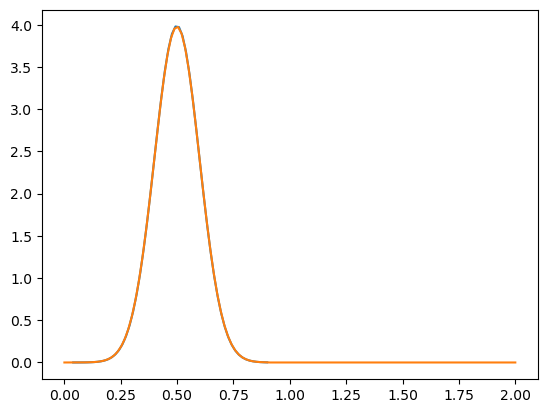

In [8]:
# Set lens density

zs2=np.linspace(0.04, 0.9, 56)
n=gaussian(zs2, 0.5, 0.1 )
n2=gaussian(zs2, 0.8, 0.05)
model.set_nz_lenses(zs2, n)
model.set_nz_sources(zs2, n2)


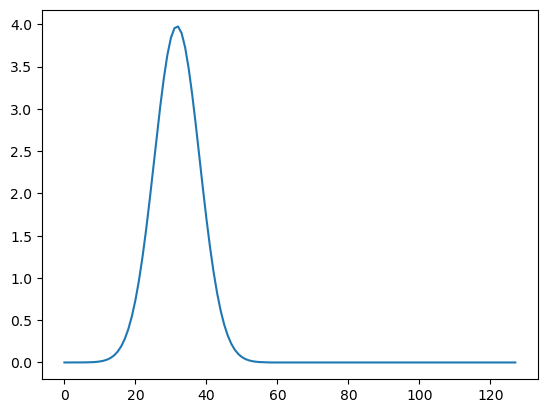

In [9]:
plt.plot(np.interp(zs, zs2, n, left=0, right=0))

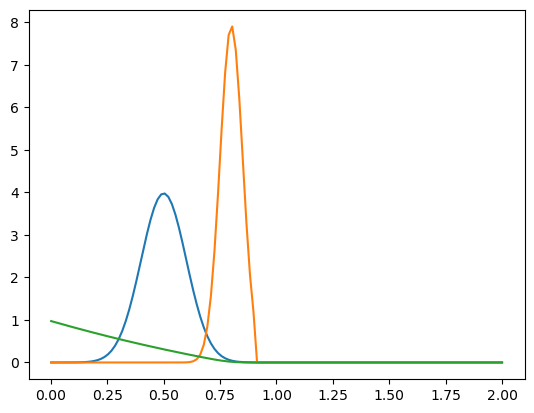

In [10]:
plt.plot(zs, model.n_l)
plt.plot(zs, model.n_s)
plt.plot(zs, model.gs)


In [11]:
# halo mass function
hmf=ccl.halos.MassFuncPress74()

model.set_hmf(hmf)


In [12]:
# halo bias

hbf=ccl.halos.HaloBiasSheth01()
model.set_halobias(hbf)

In [13]:
# Concentration mass relation

cmfunc=ccl.halos.ConcentrationDuffy08()
model.set_concentration_mass_relation(cmfunc)

(0.03, 100)

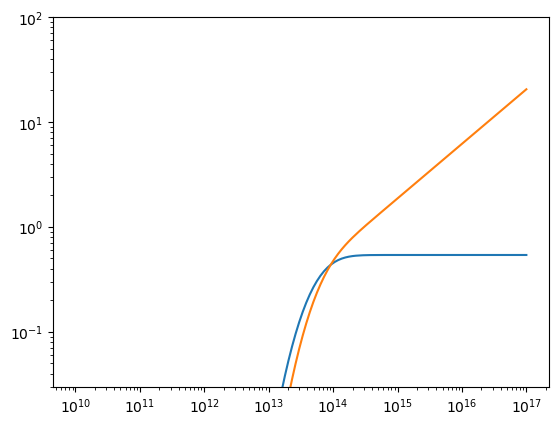

In [14]:
# HOD

alpha=0.2
sigma=0.7
Mth=5e13
Mprime=3e14
beta=0.52
alpha=0.54

hod_cen, hod_sat = g3lhalo.HOD_Zheng(alpha, Mth, sigma, Mprime, beta)

model.set_hods(hod_cen, hod_sat)

ms=np.geomspace(model.mmin, model.mmax, model.nbins)

plt.loglog()
plt.plot(ms, model.hod_cen1(ms))
plt.plot(ms, model.hod_sat1(ms))
plt.ylim(0.03, 100)


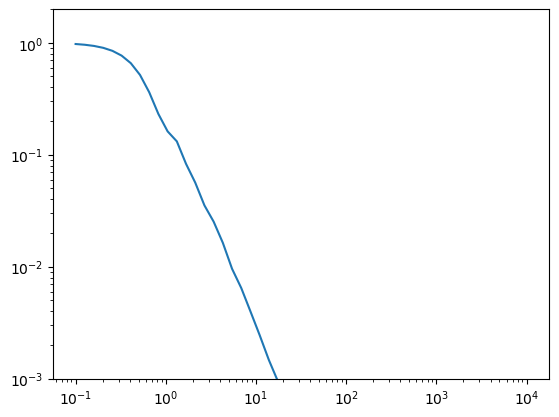

In [15]:
ks=np.geomspace(1e-1, 1e4)

us=model.u_NFW(ks, m=1e16, z=0, f=1)

plt.ylim(1e-3, 2)
plt.loglog(ks, us)

In [16]:
model.get_ave_numberdensity(0)

7.109117198300221e-05

In [17]:
h1=model.lens_lens_ps_1h(ks, 0)

/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:229: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral.append(integrate.quad(kernel, self.mmin, self.mmax)[0])


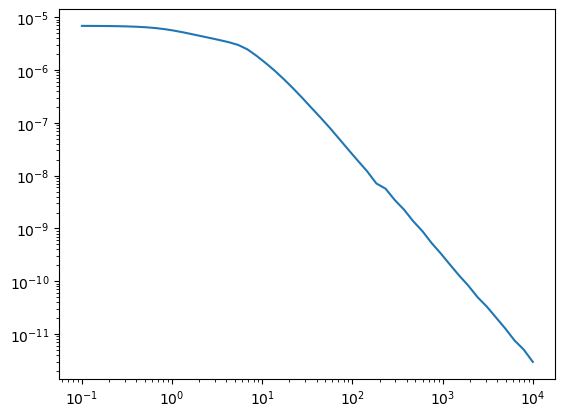

In [18]:
plt.loglog(ks, h1)

In [19]:
model.G_ab(ks, ks, 1e15, 0)

array([2.90532624e+00, 2.89122514e+00, 2.86882846e+00, 2.83341023e+00,
       2.77778727e+00, 2.69139674e+00, 2.55957091e+00, 2.36399297e+00,
       2.08648315e+00, 1.71941267e+00, 1.28414115e+00, 8.47334741e-01,
       5.05500157e-01, 3.19570938e-01, 2.45903998e-01, 1.65119613e-01,
       9.93747524e-02, 6.99414450e-02, 4.61556479e-02, 2.88029406e-02,
       1.88959098e-02, 1.09127226e-02, 7.22541106e-03, 4.29621574e-03,
       2.69321049e-03, 1.81548665e-03, 1.14467492e-03, 7.00824969e-04,
       4.32477170e-04, 2.71007108e-04, 1.68521418e-04, 1.10037693e-04,
       6.95369027e-05, 4.09277122e-05, 2.72006806e-05, 1.62619197e-05,
       1.03656537e-05, 6.57463997e-06, 3.81338404e-06, 2.42243985e-06,
       1.54000024e-06, 1.00271431e-06, 6.33498858e-07, 3.85836378e-07,
       2.28275089e-07, 1.49148006e-07, 8.77548402e-08, 6.04963247e-08,
       3.59391678e-08, 2.15706714e-08])

In [20]:
model.hod_cen1(1e15)

0.539994945201681

In [21]:
P1h, P2h, P = model.lens_lens_ps(ks, 0)

/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:229: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral.append(integrate.quad(kernel, self.mmin, self.mmax)[0])


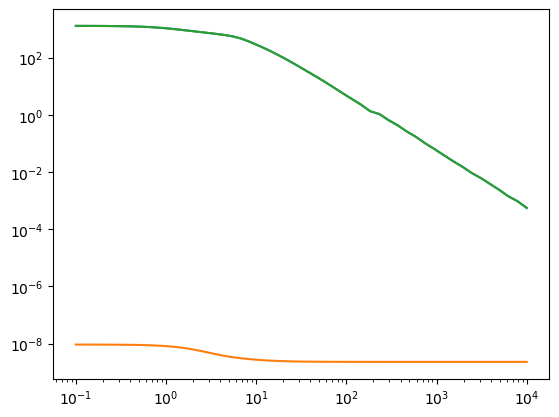

In [24]:
plt.loglog(ks, P1h)
plt.loglog(ks, P2h)
plt.loglog(ks, P)



In [25]:
P1h, P2h, P = model.source_lens_ps(ks, 0)


/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:279: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral.append(integrate.quad(kernel, self.mmin, self.mmax)[0])
/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:296: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the inte

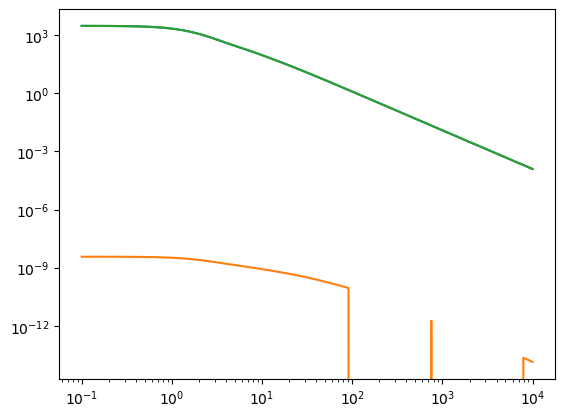

In [26]:
plt.loglog(ks, P1h)
plt.loglog(ks, P2h)
plt.loglog(ks, P)